In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample

/Users/aronak/miniconda3/envs/ml_3_6/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
def get_distribution(data):
    print(data.value_counts(normalize=True))
    print(data.value_counts())

In [20]:
df=pd.read_csv('representative_sample.csv',parse_dates=['click_time','attributed_time'],index_col=0)

/Users/aronak/miniconda3/envs/ml_3_6/lib/python3.5/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [21]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,191846,3,1,19,379,2017-11-06 15:44:48,NaT,0
1,104033,2,1,57,224,2017-11-06 15:54:12,NaT,0
2,201181,9,1,13,215,2017-11-06 16:00:00,NaT,0
3,111902,15,1,19,140,2017-11-06 16:00:00,NaT,0
4,192533,10,1,22,113,2017-11-06 16:00:01,NaT,0


In [22]:
def get_downsampled_data(df_majority,df_minority):
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,
                                     n_samples=df_minority.shape[0],
                                     random_state=1) 
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    print(df_downsampled.is_attributed.value_counts())
    return df_downsampled.reset_index(drop=True)
    

In [23]:
df_majority = df[df.is_attributed==0]
df_minority = df[df.is_attributed==1]

df = get_downsampled_data(df_majority,df_minority)
get_distribution(df.is_attributed)

1    2489
0    2489
Name: is_attributed, dtype: int64
1    0.5
0    0.5
Name: is_attributed, dtype: float64
1    2489
0    2489
Name: is_attributed, dtype: int64


In [7]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,5348,9,1,15,234,2017-11-08 09:30:12,NaT,0
1,50982,8,1,22,145,2017-11-09 07:25:27,NaT,0
2,45386,12,1,8,265,2017-11-08 21:47:48,NaT,0
3,95790,12,1,13,178,2017-11-09 13:52:53,NaT,0
4,199891,12,1,25,178,2017-11-07 15:54:14,NaT,0


In [8]:
def get_X_y(df):
    y = df[['is_attributed']].reset_index(drop=True)
    X = df.drop('attributed_time',axis=1).reset_index(drop=True)
    return X,y
X,y= get_X_y(df)

In [9]:
y.head()
X.head()

,is_attributed
0,0
1,0
2,0
3,0
4,0


,ip,app,device,os,channel,click_time,is_attributed
0,5348,9,1,15,234,2017-11-08 09:30:12,0
1,50982,8,1,22,145,2017-11-09 07:25:27,0
2,45386,12,1,8,265,2017-11-08 21:47:48,0
3,95790,12,1,13,178,2017-11-09 13:52:53,0
4,199891,12,1,25,178,2017-11-07 15:54:14,0


In [10]:
def save_sample(X_train,X_test,y_train, y_test):
    X_train.to_csv('X_train.csv',index=False)
    X_test.to_csv('X_test.csv',index=False)
    y_train.to_csv('y_train.csv',index=False)
    y_test.to_csv('y_test.csv',index=False)
        

In [11]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.5)
save_sample(X_train,X_test,y_train, y_test)

In [12]:
y_train.head()

,is_attributed
2636,1
3717,1
2425,0
4143,1
1993,0


In [15]:
get_distribution(y_train.is_attributed)

1    0.512656
0    0.487344
Name: is_attributed, dtype: float64


In [16]:
get_distribution(y_test.is_attributed)

0    0.512656
1    0.487344
Name: is_attributed, dtype: float64


In [17]:
import seaborn as sns

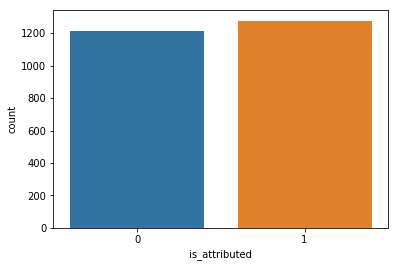

In [18]:
sns.countplot(y_train.is_attributed)